<a href="https://colab.research.google.com/github/aadi-mishra/Deep-Learning-Projects-Keras/blob/main/multiclassClassification_Reuters_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to build a network to classify Reuters newswires into 46 mutually exclusive topics.Reuters dataset is a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.
Reuters dataset comes packaged as part of Keras.

In [4]:
# Load Dataset
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import pandas as pd

The argument`num_words=10000` restricts the data to the
10,000 most frequently occurring words found in the data.

In [5]:
# Separate Training and Testing data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [6]:
print("Training Data : ",len(train_data))
print( "Testing Data : ", len(test_data))


Training Data :  8982
Testing Data :  2246


Decoding data back to English words

In [7]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reversed_word_index.get(i-3,'?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [8]:
train_labels[19]

21

Vectorizing the Training data

In [9]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Vectorizing the Labels

In [10]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
# Designing our network 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
# Compiling the model 
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Separating data for Validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [ ]:
# Training our network
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 57ms/step - loss: 3.0821 - accuracy: 0.4068 - val_loss: 1.6841 - val_accuracy: 0.6140
Epoch 2/20
16/16 [==============================] - 1s 40ms/step - loss: 1.4820 - accuracy: 0.6804 - val_loss: 1.2716 - val_accuracy: 0.7270
Epoch 3/20
16/16 [==============================] - 1s 40ms/step - loss: 1.0649 - accuracy: 0.7779 - val_loss: 1.1175 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.8429 - accuracy: 0.8190 - val_loss: 1.0457 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 1s 40ms/step - loss: 0.6753 - accuracy: 0.8559 - val_loss: 0.9677 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 39ms/step - loss: 0.5293 - accuracy: 0.8939 - val_loss: 0.9277 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 40ms/step - loss: 0.4313 - accuracy: 0.9105 - val_loss: 0.9014 - val_accuracy: 0.8150
Epoch 8/20
16

Plotting the training and validation loss

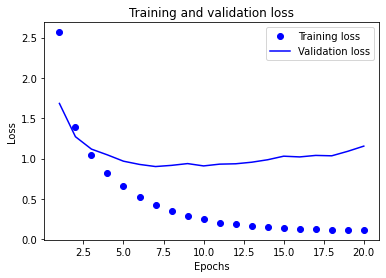

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting the training and validation accuracy

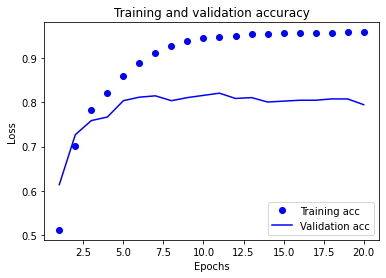

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 50ms/step - loss: 3.0711 - accuracy: 0.4274 - val_loss: 1.7200 - val_accuracy: 0.6370
Epoch 2/9
16/16 [==============================] - 1s 41ms/step - loss: 1.4693 - accuracy: 0.6938 - val_loss: 1.3193 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 1s 40ms/step - loss: 1.0723 - accuracy: 0.7734 - val_loss: 1.1526 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 1s 39ms/step - loss: 0.8426 - accuracy: 0.8245 - val_loss: 1.0421 - val_accuracy: 0.7900
Epoch 5/9
16/16 [==============================] - 1s 40ms/step - loss: 0.6627 - accuracy: 0.8616 - val_loss: 0.9773 - val_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 1s 41ms/step - loss: 0.5263 - accuracy: 0.8937 - val_loss: 0.9353 - val_accuracy: 0.8180
Epoch 7/9
16/16 [==============================] - 1s 40ms/step - loss: 0.4329 - accuracy: 0.9112 - val_loss: 0.9277 - val_accuracy: 0.8070
Epoch 8/9
16/16 [===

 Playing with the hidden layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 3s 116ms/step - loss: 2.7897 - accuracy: 0.3731 - val_loss: 1.4117 - val_accuracy: 0.6960
Epoch 2/9
16/16 [==============================] - 2s 106ms/step - loss: 1.2396 - accuracy: 0.7166 - val_loss: 1.1330 - val_accuracy: 0.7400
Epoch 3/9
16/16 [==============================] - 2s 101ms/step - loss: 0.8636 - accuracy: 0.8037 - val_loss: 1.0195 - val_accuracy: 0.7800
Epoch 4/9
16/16 [==============================] - 2s 113ms/step - loss: 0.5991 - accuracy: 0.8677 - val_loss: 1.1781 - val_accuracy: 0.7390
Epoch 5/9
16/16 [==============================] - 2s 110ms/step - loss: 0.5061 - accuracy: 0.8853 - val_loss: 1.0225 - val_accuracy: 0.7840
Epoch 6/9
16/16 [==============================] - 2s 112ms/step - loss: 0.3313 - accuracy: 0.9282 - val_loss: 0.9561 - val_accuracy: 0.8230
Epoch 7/9
16/16 [==============================] - 2s 120ms/step - loss: 0.2369 - accuracy: 0.9437 - val_loss: 1.0429 - val_accuracy: 0.7930
Epoch 8/9
16/